<a href="https://colab.research.google.com/github/IndhumathiBaskar/Pytorch-/blob/main/Pytorch_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

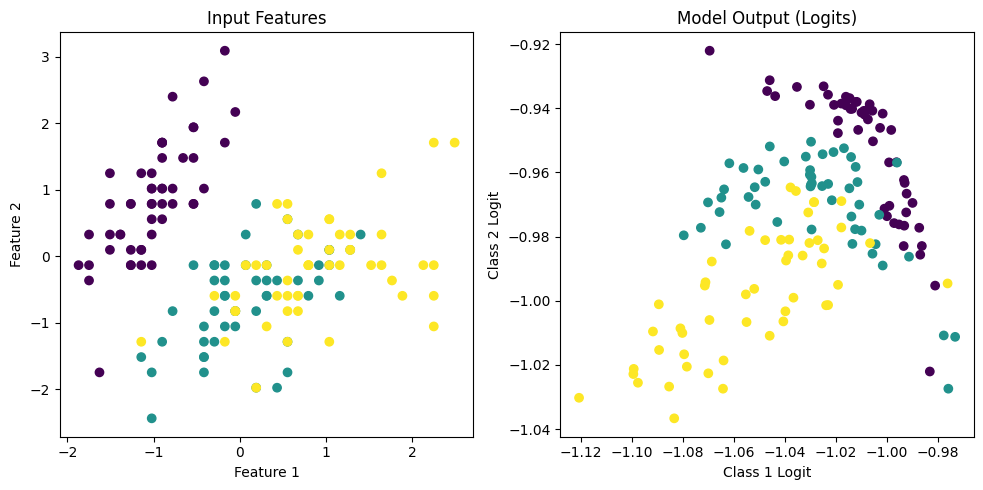

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Model Class
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return F.log_softmax(x, dim=1)  # For classification

# Load the Iris dataset
iris = load_iris()
X = iris['data']  # input features
y = iris['target']  # labels

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to tensors
X = torch.tensor(X, dtype=torch.float32)

# Instantiate the model
torch.manual_seed(41)
model = Model()

# Forward pass (get predictions)
with torch.no_grad():
    output = model(X)

# Visualize the input and output
def plot_inputs_outputs(X, output):
    # Convert torch tensor to numpy for plotting
    X_np = X.numpy()
    output_np = output.numpy()

    # Plot input features
    plt.figure(figsize=(10, 5))

    # Plot input features
    plt.subplot(1, 2, 1)
    plt.scatter(X_np[:, 0], X_np[:, 1], c=y, cmap='viridis')
    plt.title("Input Features")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    # Plot output (logits from model)
    plt.subplot(1, 2, 2)
    plt.scatter(output_np[:, 0], output_np[:, 1], c=y, cmap='viridis')
    plt.title("Model Output (Logits)")
    plt.xlabel("Class 1 Logit")
    plt.ylabel("Class 2 Logit")

    plt.tight_layout()
    plt.show()

# Call the visualization function
plot_inputs_outputs(X, output)


Saving iris.jpg to iris (2).jpg
Raw model output (logits): tensor([[ 0.1002, -0.1006,  0.0151]])
Probabilities: tensor([[0.3654, 0.2990, 0.3356]])
Predicted class: setosa


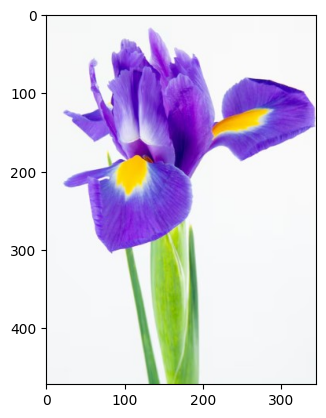

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the CNN Model for handling larger images
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, 1)
        self.conv3 = nn.Conv2d(32, 64, 3, 1, 1)

        # Calculate the size of the output feature map after convolutions
        self.fc1 = nn.Linear(64 * 345 * 472, 128)  # Adjusted based on feature map size
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 3)  # Assuming 3 output classes

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.view(x.size(0), -1)  # Flatten the tensor for the FC layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = CNNModel()

# Define the image transformation
transform = transforms.Compose([
    transforms.Resize((345, 472)),  # Adjust to match the image size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load and preprocess the image
def load_image(image_path):
    img = Image.open(image_path)
    img = transform(img)
    img = img.unsqueeze(0)  # Add batch dimension
    return img

# Predict the image
def predict_image(image_path):
    model.eval()  # Set model to evaluation mode
    img_tensor = load_image(image_path)

    with torch.no_grad():
        output = model(img_tensor)

    return output

# Map class indices to class names
class_names = ['setosa', 'versicolor', 'virginica']

# Get the class with the highest probability
def get_class_name(probabilities):
    _, predicted_idx = torch.max(probabilities, 1)
    return class_names[predicted_idx.item()]

# Upload an image using Colab's file uploader
from google.colab import files
uploaded = files.upload()

# Get the filename of the uploaded image
image_filename = next(iter(uploaded))

# Run prediction on the uploaded image
output = predict_image(image_filename)
print("Raw model output (logits):", output)

# Convert logits to probabilities
probabilities = F.softmax(output, dim=1)
print("Probabilities:", probabilities)

# Get the predicted class name
predicted_class = get_class_name(probabilities)
print("Predicted class:", predicted_class)

# Display the uploaded image
img = Image.open(image_filename)
plt.imshow(img)
plt.show()


Saving dog.jpg to dog.jpg
Raw model output (logits): tensor([[-0.0521, -0.0833]])
Probabilities: tensor([[0.5078, 0.4922]])
Predicted class: cat


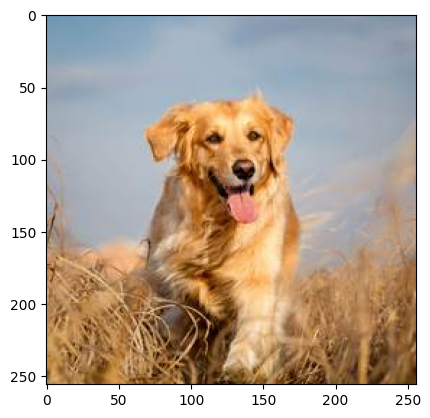

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from google.colab import files

# Define the CNN Model for handling images
class CNNModel(nn.Module):
    def __init__(self, num_classes=2):  # Update num_classes to match your classification task
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, 1)
        self.conv3 = nn.Conv2d(32, 64, 3, 1, 1)

        # Adjust the size of the input to the fully connected layer based on feature map size
        self.fc1 = nn.Linear(64 * 256 * 256, 128)  # Adjust size if needed
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)  # Output layer

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.view(x.size(0), -1)  # Flatten the tensor for fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = CNNModel(num_classes=2)  # Update num_classes to match the number of classes

# Define the image transformation
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Adjust size as needed
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example values
])

# Load and preprocess the image
def load_image(image_path):
    img = Image.open(image_path)
    img = transform(img)
    img = img.unsqueeze(0)  # Add batch dimension
    return img

# Predict the image
def predict_image(image_path):
    model.eval()  # Set model to evaluation mode
    img_tensor = load_image(image_path)

    with torch.no_grad():
        output = model(img_tensor)

    return output

# Map class indices to class names
class_names = ['cat', 'dog']  # Update based on your new classes

# Get the class with the highest probability
def get_class_name(probabilities):
    _, predicted_idx = torch.max(probabilities, 1)
    return class_names[predicted_idx.item()]

# Upload an image using Colab's file uploader
uploaded = files.upload()

# Get the filename of the uploaded image
image_filename = next(iter(uploaded))

# Run prediction on the uploaded image
output = predict_image(image_filename)
print("Raw model output (logits):", output)

# Convert logits to probabilities
probabilities = F.softmax(output, dim=1)
print("Probabilities:", probabilities)

# Get the predicted class name
predicted_class = get_class_name(probabilities)
print("Predicted class:", predicted_class)

# Display the uploaded image
img = Image.open(image_filename)
plt.imshow(img)
plt.show()
